In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
from datetime import date
import seaborn as sn

In [2]:
df = pd.read_csv('hour.csv',header=0)

In [3]:
pd.to_datetime(df['dteday'])
df['day']=pd.to_numeric([d.split('-')[2] for d in df.dteday])

In [4]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,1
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,1
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,1
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,1
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,1


In [5]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
day             int64
dtype: object

In [6]:
# Dropping the correleated features and unnecessary features 
df.drop(['dteday','instant','casual','registered','atemp'],1,inplace = True)
df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,day
0,1,0,1,0,0,6,0,1,0.24,0.81,0.0,16,1
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0,40,1
2,1,0,1,2,0,6,0,1,0.22,0.80,0.0,32,1
3,1,0,1,3,0,6,0,1,0.24,0.75,0.0,13,1
4,1,0,1,4,0,6,0,1,0.24,0.75,0.0,1,1


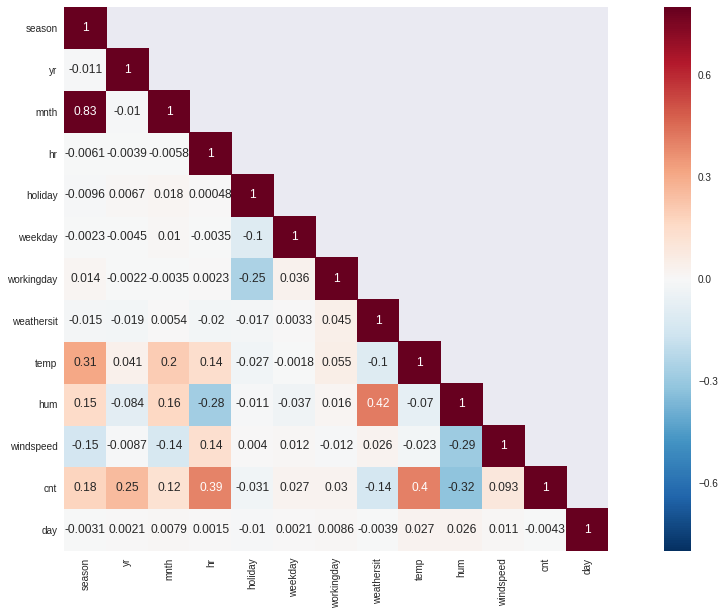

In [7]:
#Correlation between features and cnt
mask = np.array(df.corr())
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(df.corr(), mask=mask,vmax=.8, square=True,annot=True)

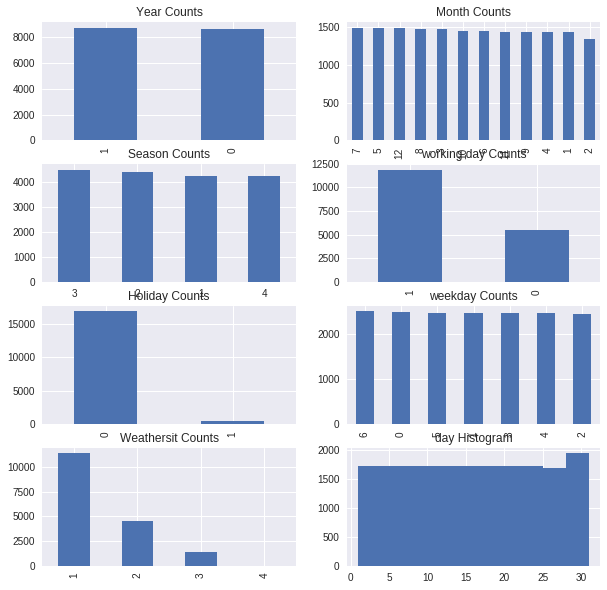

In [8]:
# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(10, 5))

# Size of matplotlib figures that contain subplots
fizsize_with_subplots = (10, 10)

# Size of matplotlib histogram bins
bin_size = 10

# Set up a grid of plots
fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (4, 2)

# Plot year counts
plt.subplot2grid(fig_dims, (0, 0))
df['yr'].value_counts().plot(kind='bar', 
                                         title='Year Counts')

# Plot month counts
plt.subplot2grid(fig_dims, (0, 1))
df['mnth'].value_counts().plot(kind='bar', 
                                       title='Month Counts')

# Plot season counts
plt.subplot2grid(fig_dims, (1, 0))
df['season'].value_counts().plot(kind='bar', 
                                    title='Season Counts')
plt.xticks(rotation=0)

# Plot working day counts
plt.subplot2grid(fig_dims, (1, 1))
df['workingday'].value_counts().plot(kind='bar', 
                                         title='working day Counts')
# Plot holiday day count
plt.subplot2grid(fig_dims, (2, 0))
df['holiday'].value_counts().plot(kind='bar', 
                                         title='Holiday Counts')
# Plot weekday day counts
plt.subplot2grid(fig_dims, (2, 1))
df['weekday'].value_counts().plot(kind='bar', 
                                         title='weekday Counts')

# Plot weather situation counts
plt.subplot2grid(fig_dims, (3, 0))
df['weathersit'].value_counts().plot(kind='bar', 
                                         title='Weathersit Counts')
# Plot the day histogram
plt.subplot2grid(fig_dims, (3, 1))
df['day'].hist()
plt.title('day Histogram')

In [9]:
Y = np.array(df.cnt)
df.drop(['cnt'],1,inplace = True)
X = np.array(df.astype('float'))

In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [51]:
train_x, test_x, train_y, test_y = train_test_split(X, Y,test_size=0.20,random_state=0)

In [56]:
def get_RMSLE(pred,actual):
    n = len(pred)
    return np.sqrt(1/n*(np.sum((np.log(pred+1)-np.log(actual+1))**2)))

In [52]:
model = RandomForestRegressor(n_estimators = 100, oob_score = True, random_state= 0)
model.fit(train_x,train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=True, random_state=0,
           verbose=0, warm_start=False)

In [57]:
print ('RMSE_Training_oob_ERROR:',get_RMSLE(model.oob_prediction_,train_y))

RMSE_Training_oob_ERROR: 0.340891659532


In [58]:
print ('RMSE_Test_ERROR:',get_RMSLE(model.predict(test_x),test_y))

RMSE_Test_ERROR: 0.345420662058
